# Import the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
students = pd.read_csv('Students.csv')

In [3]:
students.head()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,B_DATASCIENCE_COURSES,B_BACKEND_COURSES,B_FRONTEND_COURSES,A_DATASCIENCE_COURSES,A_BACKEND_COURSES,A_FRONTEND_COURSES,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,28,Stormy Muto,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,81,Carlos Ferro,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,89,Robby Constantini,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,138,Paul Mckenny,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,143,Jean Webb,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end


In [4]:
students.shape

(20000, 16)

In [5]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20000 non-null  int64  
 1   NAME                   20000 non-null  object 
 2   USER_ID                20000 non-null  int64  
 3   HOURS_DATASCIENCE      19986 non-null  float64
 4   HOURS_BACKEND          19947 non-null  float64
 5   HOURS_FRONTEND         19984 non-null  float64
 6   B_DATASCIENCE_COURSES  19974 non-null  float64
 7   B_BACKEND_COURSES      19982 non-null  float64
 8   B_FRONTEND_COURSES     19961 non-null  float64
 9   A_DATASCIENCE_COURSES  19998 non-null  float64
 10  A_BACKEND_COURSES      19992 non-null  float64
 11  A_FRONTEND_COURSES     19963 non-null  float64
 12  AVG_SCORE_DATASCIENCE  19780 non-null  float64
 13  AVG_SCORE_BACKEND      19916 non-null  float64
 14  AVG_SCORE_FRONTEND     19832 non-null  float64
 15  PR

In [6]:
students.isnull().sum()

Unnamed: 0                 0
NAME                       0
USER_ID                    0
HOURS_DATASCIENCE         14
HOURS_BACKEND             53
HOURS_FRONTEND            16
B_DATASCIENCE_COURSES     26
B_BACKEND_COURSES         18
B_FRONTEND_COURSES        39
A_DATASCIENCE_COURSES      2
A_BACKEND_COURSES          8
A_FRONTEND_COURSES        37
AVG_SCORE_DATASCIENCE    220
AVG_SCORE_BACKEND         84
AVG_SCORE_FRONTEND       168
PROFILE                    0
dtype: int64

# Data Cleaning

In [7]:
students['HOURS_DATASCIENCE'] = students['HOURS_DATASCIENCE'].fillna(students['HOURS_DATASCIENCE'].median())
students['HOURS_BACKEND'] = students['HOURS_BACKEND'].fillna(students['HOURS_BACKEND'].median())
students['HOURS_FRONTEND'] = students['HOURS_FRONTEND'].fillna(students['HOURS_FRONTEND'].median())
students['B_DATASCIENCE_COURSES'] = students['B_DATASCIENCE_COURSES'].fillna(students['B_DATASCIENCE_COURSES'].median())
students['B_BACKEND_COURSES'] = students['B_BACKEND_COURSES'].fillna(students['B_BACKEND_COURSES'].median())
students['B_FRONTEND_COURSES'] = students['B_FRONTEND_COURSES'].fillna(students['B_FRONTEND_COURSES'].median())
students['A_DATASCIENCE_COURSES'] = students['A_DATASCIENCE_COURSES'].fillna(students['A_DATASCIENCE_COURSES'].median())
students['A_BACKEND_COURSES'] = students['A_BACKEND_COURSES'].fillna(students['A_BACKEND_COURSES'].median())
students['A_FRONTEND_COURSES'] = students['A_FRONTEND_COURSES'].fillna(students['A_FRONTEND_COURSES'].median())
students['AVG_SCORE_DATASCIENCE'] = students['AVG_SCORE_DATASCIENCE'].fillna(students['AVG_SCORE_DATASCIENCE'].median())
students['AVG_SCORE_BACKEND'] = students['AVG_SCORE_BACKEND'].fillna(students['AVG_SCORE_BACKEND'].median())
students['AVG_SCORE_FRONTEND'] = students['AVG_SCORE_FRONTEND'].fillna(students['AVG_SCORE_FRONTEND'].median())

In [8]:
students.isnull().sum()

Unnamed: 0               0
NAME                     0
USER_ID                  0
HOURS_DATASCIENCE        0
HOURS_BACKEND            0
HOURS_FRONTEND           0
B_DATASCIENCE_COURSES    0
B_BACKEND_COURSES        0
B_FRONTEND_COURSES       0
A_DATASCIENCE_COURSES    0
A_BACKEND_COURSES        0
A_FRONTEND_COURSES       0
AVG_SCORE_DATASCIENCE    0
AVG_SCORE_BACKEND        0
AVG_SCORE_FRONTEND       0
PROFILE                  0
dtype: int64

# Data Visualization

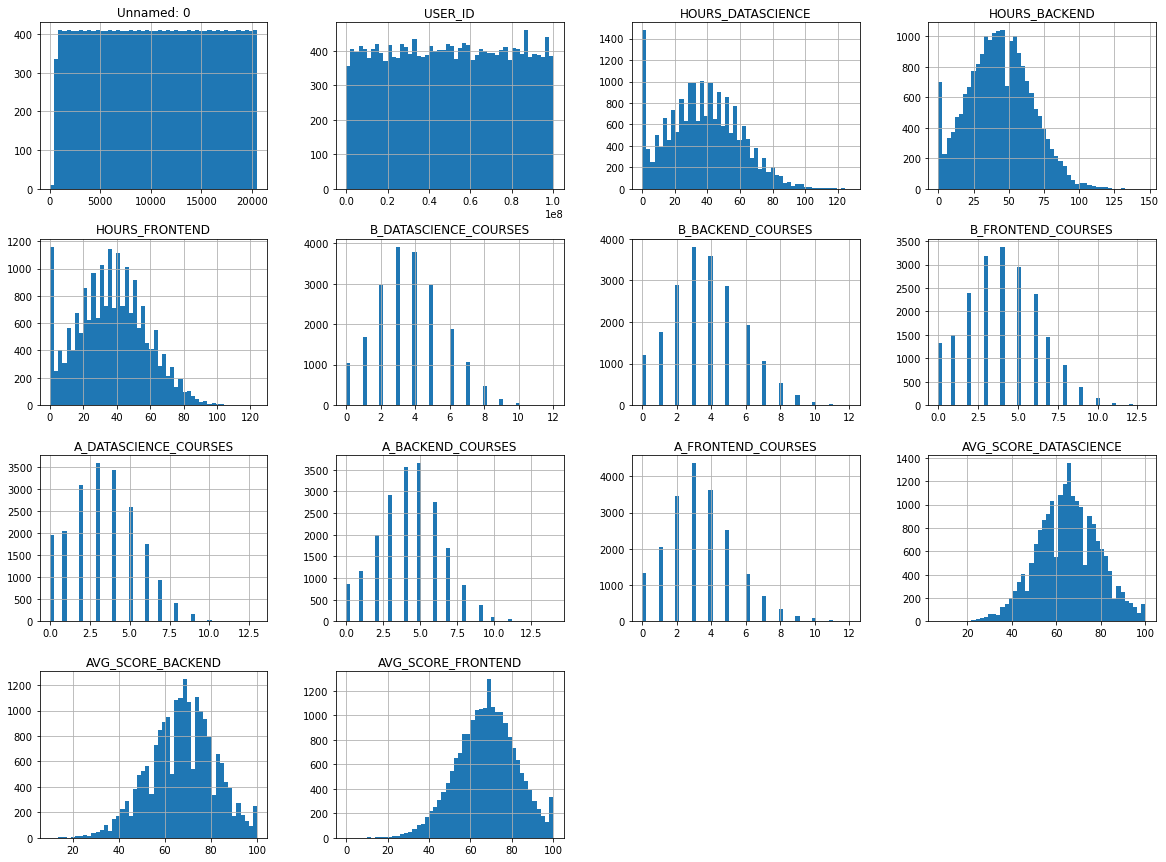

In [9]:
students.hist(bins = 50, figsize = (20, 15))
plt.show()

In [10]:
target_names = students['PROFILE'].unique()
print(target_names)

['beginner_front_end' 'advanced_front_end' 'beginner_data_science'
 'beginner_backend' 'advanced_data_science' 'advanced_backend']


In [11]:
students['PROFILE'] = students['PROFILE'].map({'beginner_front_end':0, 'advanced_front_end':1, \
    'beginner_data_science':2, 'advanced_data_science':3, 'beginner_backend':4, 'advanced_backend':5})

In [12]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20000 non-null  int64  
 1   NAME                   20000 non-null  object 
 2   USER_ID                20000 non-null  int64  
 3   HOURS_DATASCIENCE      20000 non-null  float64
 4   HOURS_BACKEND          20000 non-null  float64
 5   HOURS_FRONTEND         20000 non-null  float64
 6   B_DATASCIENCE_COURSES  20000 non-null  float64
 7   B_BACKEND_COURSES      20000 non-null  float64
 8   B_FRONTEND_COURSES     20000 non-null  float64
 9   A_DATASCIENCE_COURSES  20000 non-null  float64
 10  A_BACKEND_COURSES      20000 non-null  float64
 11  A_FRONTEND_COURSES     20000 non-null  float64
 12  AVG_SCORE_DATASCIENCE  20000 non-null  float64
 13  AVG_SCORE_BACKEND      20000 non-null  float64
 14  AVG_SCORE_FRONTEND     20000 non-null  float64
 15  PR

In [13]:
students = students.drop(['Unnamed: 0', 'NAME', 'USER_ID'], axis = 1)

In [14]:
students.isnull().sum()

HOURS_DATASCIENCE        0
HOURS_BACKEND            0
HOURS_FRONTEND           0
B_DATASCIENCE_COURSES    0
B_BACKEND_COURSES        0
B_FRONTEND_COURSES       0
A_DATASCIENCE_COURSES    0
A_BACKEND_COURSES        0
A_FRONTEND_COURSES       0
AVG_SCORE_DATASCIENCE    0
AVG_SCORE_BACKEND        0
AVG_SCORE_FRONTEND       0
PROFILE                  0
dtype: int64

In [15]:
features = students.drop(['PROFILE'], axis = 1)
target = students['PROFILE']

# Split the Data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, random_state = 42)

# Select and Train the Model

In [17]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth = 18, min_samples_leaf = 3)   

In [18]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=18, min_samples_leaf=3, random_state=42)

In [19]:
predict = model.predict(x_test)

# Evaluate the Model

In [20]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       654
           1       0.80      0.77      0.79       681
           2       0.77      0.80      0.78       651
           3       0.76      0.75      0.76       710
           4       0.75      0.72      0.74       655
           5       0.77      0.76      0.76       649

    accuracy                           0.78      4000
   macro avg       0.77      0.78      0.77      4000
weighted avg       0.77      0.78      0.77      4000



In [21]:
the_matrix = confusion_matrix(y_test, predict)
print(the_matrix)

[[555  25  20  20  16  18]
 [ 36 524  32  32  33  24]
 [ 23  31 519  24  37  17]
 [ 31  29  39 535  31  45]
 [ 25  24  39  49 473  45]
 [ 23  20  27  47  38 494]]
